In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

merged = pd.read_csv(r"C:\Users\Jurgen\Desktop\PDS-Assignment-1\Assignment 2\After Cleansing\Merged.csv")
merged = merged[merged.year >= 2000]
merged

,year,sex,lasalle_degree,nafa_degree,nie,ntu,nus,sit,smu,suss,sutd,total,type
54,2000,F,0,0,2247,6223,11341,0,212,0,0,20023,enroll
55,2000,MF,0,0,3072,14583,21233,0,305,0,0,39193,enroll
56,2000,M,0,0,825,8360,9892,0,93,0,0,19170,enroll
57,2001,F,0,0,2292,6504,11781,0,579,0,0,21156,enroll
58,2001,MF,0,0,3095,15008,22172,0,803,0,0,41078,enroll
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,2013,F,318,22,899,3266,3350,695,920,0,107,9577,graduate
293,2013,MF,466,34,1292,6174,6446,1494,1779,0,267,17952,graduate
294,2014,M,110,5,310,3037,3094,995,984,56,182,8773,graduate
295,2014,MF,429,15,1153,5990,6700,1744,1887,168,334,18420,graduate


In [3]:
NUS = merged[["year", "sex","nus", "total", "type"]]
NUS

,year,sex,nus,total,type
54,2000,F,11341,20023,enroll
55,2000,MF,21233,39193,enroll
56,2000,M,9892,19170,enroll
57,2001,F,11781,21156,enroll
58,2001,MF,22172,41078,enroll
...,...,...,...,...,...
292,2013,F,3350,9577,graduate
293,2013,MF,6446,17952,graduate
294,2014,M,3094,8773,graduate
295,2014,MF,6700,18420,graduate


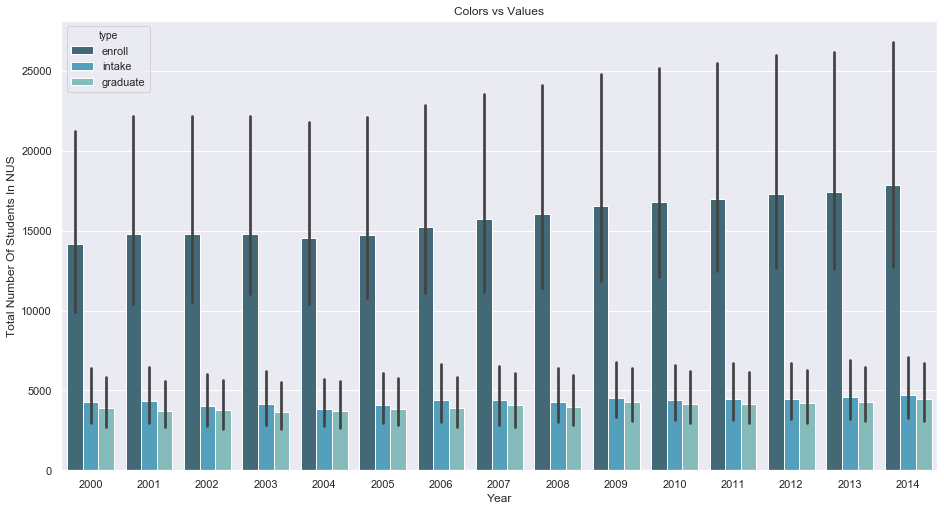

In [4]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.barplot(x="year", y="nus", hue= "type", data=NUS, palette="GnBu_d")

ax.set(xlabel='Year', ylabel='Total Number Of Students In NUS')
plt.title("Colors vs Values")


plt.show(ax)


In [5]:
intake_grad = NUS[NUS.type !="enroll"]
intake_grad = intake_grad[intake_grad.sex != "MF"].sort_values("year").reset_index(drop = True)
intake_grad

,year,sex,nus,total,type
0,2000,F,3437,7326,intake
1,2000,F,3161,6601,graduate
2,2000,M,2697,5553,graduate
3,2000,M,2984,6092,intake
4,2001,F,3534,7377,intake
5,2001,M,2524,5380,graduate
6,2001,F,3051,6671,graduate
7,2001,M,2945,5869,intake
8,2002,M,2767,5999,intake
9,2002,F,3252,7390,intake


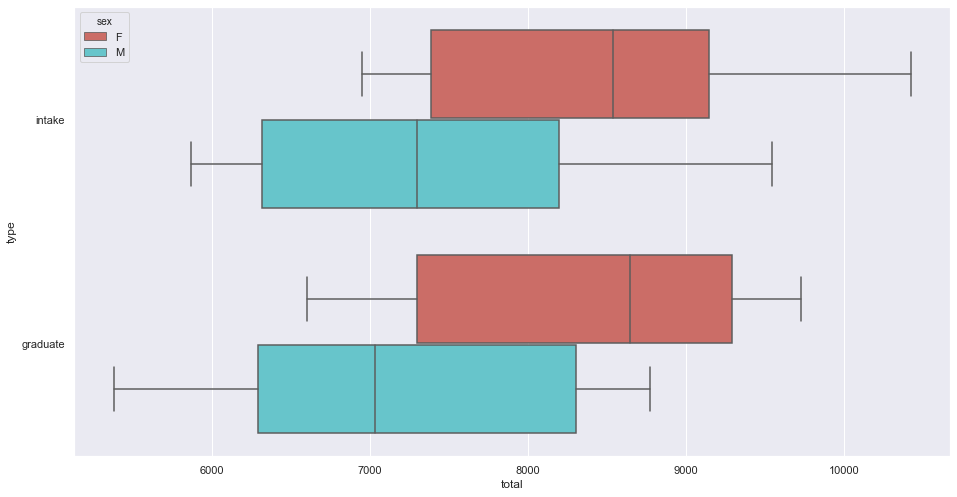

In [46]:
#Look at the past events in the 14 years
ax = sns.boxplot(x="total", y="type", hue = "sex", palette = "hls", data=intake_grad)

In [135]:
# employment = pd.read_csv(r"C:\Users\jurge\Desktop\School Related\PDS-Assignment-1\Assignment 2\Raw Data\graduate-employment-survey-ntu-nus-sit-smu-sutd.csv")
# employment = employment[employment.university == "National University of Singapore"]
# employment

In [47]:
firstgrad = pd.read_csv(r"C:\Users\Jurgen\Desktop\PDS-Assignment-1\Assignment 2\Raw Data\graduates-from-university-first-degree-courses-by-type-of-course.csv",
                       na_values = "na")
firstgrad = firstgrad[firstgrad.year >= 2000].reset_index(drop = True).set_index(["year", "type_of_course"])
# firstgrad = firstgrad[firstgrad.type_of_course.isin(["Engineering Sciences", 
#                                                      "Humanities & Social Sciences", 
#                                                      "Natural, Physical & Mathematical Sciences"])].reset_index(drop = True).set_index(["year", "type_of_course"])
firstgrad.no_of_graduates = firstgrad.no_of_graduates.fillna(0).astype(int)
firstgrad

sex  no_of_graduates
year type_of_course                                        
2000 Education                       Males               35
     Applied Arts                    Males                0
     Humanities & Social Sciences    Males              574
     Mass Communication              Males               34
     Accountancy                     Males              250
...                                    ...              ...
2014 Health Sciences               Females              309
     Information Technology        Females              289
     Architecture & Building       Females              258
     Engineering Sciences          Females             1251
     Services                      Females              219

[450 rows x 2 columns]

In [48]:

firstgrad["total"] = firstgrad.no_of_graduates.groupby(level=["year", "type_of_course"]).sum()
# firstgrad
# type(total)

In [52]:
firstgrad = firstgrad.reset_index()
firstgrad.head(10)

,level_0,index,year,type_of_course,sex,no_of_graduates,total
0,0,0,2000,Education,Males,35,150
1,1,1,2000,Applied Arts,Males,0,0
2,2,2,2000,Humanities & Social Sciences,Males,574,2026
3,3,3,2000,Mass Communication,Males,34,114
4,4,4,2000,Accountancy,Males,250,745
5,5,5,2000,Business & Administration,Males,328,1179
6,6,6,2000,Law,Males,74,153
7,7,7,2000,"Natural, Physical & Mathematical Sciences",Males,378,1033
8,8,8,2000,Medicine,Males,119,156
9,9,9,2000,Dentistry,Males,17,32


In [14]:
# sns.distplot(firstgrad.total, bins = 20, kde=False, rug=True);
# plt.show()

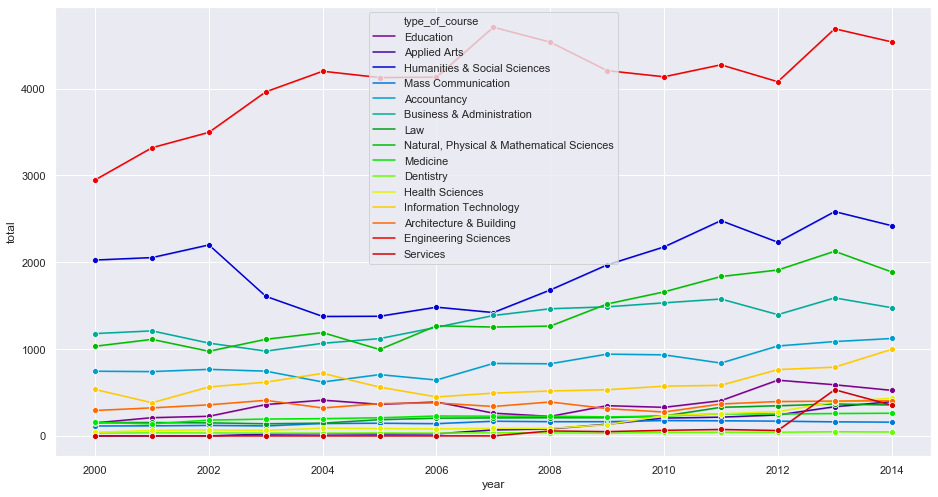

In [59]:
ax = sns.lineplot(x="year", y="total", hue = "type_of_course", marker = "o", data=firstgrad, palette="nipy_spectral")

In [53]:


#Engineering Sciences, Humanities & Social Sciences, Natural, Physical & Mathematical Sciences